In [1]:
import os
import pandas as pd
import numpy as np

train_path = 'C:/Users/zhang/mine/finTech/data/A/训练数据集'
test_path = 'C:/Users/zhang/mine/finTech/data/A/评分数据集'

In [2]:
train_tag_DF = pd.read_csv(train_path + '/训练数据集_tag.csv')
train_trd_DF = pd.read_csv(train_path + '/训练数据集_trd.csv')
train_beh_DF = pd.read_csv(train_path + '/训练数据集_beh.csv')

In [3]:
train_tag_DF.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,0,M,41,B,B,Z,NaN,3,0,...,-1,0,0,0,3,1,0,3492,-1,10
1,U557810,0,M,35,A,NaN,G,NaN,4,0,...,-1,0,0,0,1,1,0,4575,-1,10
2,U1E9240,0,M,53,B,A,C,C,9,0,...,-1,0,0,0,7,2,0,4894,-1,40
3,U6DED00,0,F,41,B,NaN,Z,NaN,0,0,...,-1,0,0,0,1,1,0,4938,-1,10
4,UDA8E28,0,F,42,B,B,Z,B,3,1,...,-1,0,0,0,2,7,0,2378,-1,20


In [4]:
train_tag_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               39923 non-null  object
 1   flag                             39923 non-null  int64 
 2   gdr_cd                           39923 non-null  object
 3   age                              39923 non-null  int64 
 4   mrg_situ_cd                      39923 non-null  object
 5   edu_deg_cd                       27487 non-null  object
 6   acdm_deg_cd                      39922 non-null  object
 7   deg_cd                           18960 non-null  object
 8   job_year                         39923 non-null  object
 9   ic_ind                           39923 non-null  object
 10  fr_or_sh_ind                     39923 non-null  object
 11  dnl_mbl_bnk_ind                  39923 non-null  object
 12  dnl_bind_cmb_lif_ind            

In [5]:
print('tag atdd_type信用卡还款方式：\n', train_tag_DF.atdd_type.value_counts())
print('\n tag deg_cd学位：\n', train_tag_DF.deg_cd.value_counts())
print('\n tag acdm_deg_cd学历：\n', train_tag_DF.acdm_deg_cd.value_counts())
print('\n tag edu_deg_cd教育程度：\n', train_tag_DF.edu_deg_cd.value_counts())

tag atdd_type信用卡还款方式：
 0     15162
1      1097
\N        7
Name: atdd_type, dtype: int64

 tag deg_cd学位：
 ~     17050
\N      736
A       543
B       332
Z       171
C       118
D        10
Name: deg_cd, dtype: int64

 tag acdm_deg_cd学历：
 G     13267
31    10419
30     8229
Z      4469
F      1635
C      1064
\N      736
D       103
Name: acdm_deg_cd, dtype: int64

 tag edu_deg_cd教育程度：
 F     6917
C     6695
B     6672
K     2312
Z     2097
G      953
A      889
\N     736
~      108
M       54
L       33
D       20
J        1
Name: edu_deg_cd, dtype: int64


In [6]:
train_trd_DF.head()

,id,flag,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt
0,UFDC88A,0,B,B,1,116,2019-06-20 07:15:28,-127.99
1,UFDC88A,0,B,B,1,116,2019-06-16 10:09:13,-55.88
2,UFDC88A,0,B,B,1,136,2019-05-14 16:11:32,-557.00
3,UFDC88A,0,B,B,1,136,2019-05-19 21:54:40,-77.80
4,UFDC88A,0,B,B,1,113,2019-06-18 08:23:59,-271.62


In [7]:
train_trd_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367211 entries, 0 to 1367210
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1367211 non-null  object 
 1   flag         1367211 non-null  int64  
 2   Dat_Flg1_Cd  1367211 non-null  object 
 3   Dat_Flg3_Cd  1367211 non-null  object 
 4   Trx_Cod1_Cd  1367211 non-null  int64  
 5   Trx_Cod2_Cd  1367211 non-null  int64  
 6   trx_tm       1367211 non-null  object 
 7   cny_trx_amt  1367211 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 83.4+ MB


In [8]:
train_beh_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934282 entries, 0 to 934281
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          934282 non-null  object 
 1   flag        934282 non-null  int64  
 2   page_no     934282 non-null  object 
 3   Unnamed: 3  934282 non-null  object 
 4   page_tm     0 non-null       float64
dtypes: float64(1), int64(1), object(3)
memory usage: 35.6+ MB


In [9]:
train_beh_DF.head()

,id,flag,page_no,Unnamed: 3,page_tm
0,U64F0C9,0,SZA,2019-06-30 12:44:27,NaN
1,U64F0C9,0,CQE,2019-06-25 16:15:11,NaN
2,U64F0C9,0,AAO,2019-06-30 12:44:17,NaN
3,U64F0C9,0,CQE,2019-06-17 13:50:12,NaN
4,U64F0C9,0,AAO,2019-06-17 13:50:08,NaN


In [10]:
tag_id_list = train_tag_DF.id.unique().tolist()
trd_id_list = train_trd_DF.id.unique().tolist()
beh_id_list = train_beh_DF.id.unique().tolist()

In [11]:
print('tag id个数: ', len(tag_id_list))
print('trd id个数: ', len(trd_id_list))
print('beh id个数: ', len(beh_id_list))

print('trd里的id是否在tag用户标签: ', sum(train_trd_DF.id.isin(train_tag_DF.id)))
print('beh里的id是否在tag用户标签', sum(train_beh_DF.id.isin(train_tag_DF.id)))

tag id个数:  39923
trd id个数:  31993
beh id个数:  11913
trd里的id是否在tag用户标签:  1367211
beh里的id是否在tag用户标签 934282


# 跟trx表合并

In [12]:
id_pay = train_trd_DF.groupby(['id', 'Dat_Flg1_Cd'])

In [13]:
id_pay_sum = id_pay['cny_trx_amt'].sum()

In [14]:
id_pay = id_pay_sum.reset_index()
id_pay.head()

,id,Dat_Flg1_Cd,cny_trx_amt
0,U000101,B,-7902.43
1,U000101,C,7828.74
2,U00015C,B,-56630.00
3,U00015C,C,27300.00
4,U0001B8,B,-8840.98


In [15]:
id_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59295 entries, 0 to 59294
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           59295 non-null  object 
 1   Dat_Flg1_Cd  59295 non-null  object 
 2   cny_trx_amt  59295 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [16]:
id_income = id_pay[id_pay['Dat_Flg1_Cd'] == 'C']
id_income.head()

,id,Dat_Flg1_Cd,cny_trx_amt
1,U000101,C,7828.74
3,U00015C,C,27300.00
5,U0001B8,C,10535.97
7,U00025B,C,29908.88
9,U000437,C,64495.47


In [17]:
id_pay = id_pay[id_pay['Dat_Flg1_Cd'] == 'B']
id_pay.head()

,id,Dat_Flg1_Cd,cny_trx_amt
0,U000101,B,-7902.43
2,U00015C,B,-56630.00
4,U0001B8,B,-8840.98
6,U00025B,B,-24606.87
8,U000437,B,-80562.19


In [18]:
id_income.reset_index(drop = True, inplace = True)
id_pay.reset_index(drop = True, inplace = True)

id_income.drop(['Dat_Flg1_Cd'], axis = 1, inplace = True)
id_pay.drop(['Dat_Flg1_Cd'], axis = 1, inplace = True)

In [19]:
id_income.rename(columns = {'cny_trx_amt': 'cny_trx_income'}, inplace = True)
id_pay.rename(columns = {'cny_trx_amt': 'cny_trx_pay'}, inplace = True)

id_income.head()

,id,cny_trx_income
0,U000101,7828.74
1,U00015C,27300.00
2,U0001B8,10535.97
3,U00025B,29908.88
4,U000437,64495.47


In [20]:
print(id_income.shape)
print(id_pay.shape)

(30102, 2)
(29193, 2)


In [21]:
train_DF = pd.merge(train_tag_DF, id_income, on = 'id', how = 'left')
train_DF.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,cny_trx_income
0,U7A4BAD,0,M,41,B,B,Z,NaN,3,0,...,0,0,0,3,1,0,3492,-1,10,17400.00
1,U557810,0,M,35,A,NaN,G,NaN,4,0,...,0,0,0,1,1,0,4575,-1,10,NaN
2,U1E9240,0,M,53,B,A,C,C,9,0,...,0,0,0,7,2,0,4894,-1,40,105718.04
3,U6DED00,0,F,41,B,NaN,Z,NaN,0,0,...,0,0,0,1,1,0,4938,-1,10,NaN
4,UDA8E28,0,F,42,B,B,Z,B,3,1,...,0,0,0,2,7,0,2378,-1,20,79505.55


In [22]:
train_DF = pd.merge(train_DF, id_pay, on = 'id', how = 'left')
train_DF.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,cny_trx_income,cny_trx_pay
0,U7A4BAD,0,M,41,B,B,Z,NaN,3,0,...,0,0,3,1,0,3492,-1,10,17400.00,-15000.00
1,U557810,0,M,35,A,NaN,G,NaN,4,0,...,0,0,1,1,0,4575,-1,10,NaN,NaN
2,U1E9240,0,M,53,B,A,C,C,9,0,...,0,0,7,2,0,4894,-1,40,105718.04,-131158.00
3,U6DED00,0,F,41,B,NaN,Z,NaN,0,0,...,0,0,1,1,0,4938,-1,10,NaN,NaN
4,UDA8E28,0,F,42,B,B,Z,B,3,1,...,0,0,2,7,0,2378,-1,20,79505.55,-70416.04


In [23]:
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               39923 non-null  object 
 1   flag                             39923 non-null  int64  
 2   gdr_cd                           39923 non-null  object 
 3   age                              39923 non-null  int64  
 4   mrg_situ_cd                      39923 non-null  object 
 5   edu_deg_cd                       27487 non-null  object 
 6   acdm_deg_cd                      39922 non-null  object 
 7   deg_cd                           18960 non-null  object 
 8   job_year                         39923 non-null  object 
 9   ic_ind                           39923 non-null  object 
 10  fr_or_sh_ind                     39923 non-null  object 
 11  dnl_mbl_bnk_ind                  39923 non-null  object 
 12  dnl_bind_cmb_lif_i

In [24]:
id_cny_trx_count = train_trd_DF.groupby(['id'])
id_cny_trx_count = id_cny_trx_count['Dat_Flg1_Cd'].count()
id_cny_trx_count = id_cny_trx_count.reset_index()
id_cny_trx_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31993 entries, 0 to 31992
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           31993 non-null  object
 1   Dat_Flg1_Cd  31993 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.0+ KB


In [25]:
id_cny_trx_count.head()

,id,Dat_Flg1_Cd
0,U000101,52
1,U00015C,11
2,U0001B8,49
3,U00025B,39
4,U000437,46


In [26]:
id_cny_trx_count.rename(columns = {'Dat_Flg1_Cd': 'trx_times'}, inplace = True)

id_cny_trx_count.head()

,id,trx_times
0,U000101,52
1,U00015C,11
2,U0001B8,49
3,U00025B,39
4,U000437,46


In [27]:
train_DF = pd.merge(train_DF, id_cny_trx_count, on = 'id', how = 'left')
train_DF.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,cny_trx_income,cny_trx_pay,trx_times
0,U7A4BAD,0,M,41,B,B,Z,NaN,3,0,...,0,3,1,0,3492,-1,10,17400.00,-15000.00,3.0
1,U557810,0,M,35,A,NaN,G,NaN,4,0,...,0,1,1,0,4575,-1,10,NaN,NaN,NaN
2,U1E9240,0,M,53,B,A,C,C,9,0,...,0,7,2,0,4894,-1,40,105718.04,-131158.00,17.0
3,U6DED00,0,F,41,B,NaN,Z,NaN,0,0,...,0,1,1,0,4938,-1,10,NaN,NaN,NaN
4,UDA8E28,0,F,42,B,B,Z,B,3,1,...,0,2,7,0,2378,-1,20,79505.55,-70416.04,18.0


# 结合app行为表beh

In [28]:
#id_beh = train_beh_DF.groupby(['id', 'page_no']).count()
id_beh = train_beh_DF.groupby(['id'])['page_no'].max()#.count()
id_beh.head()

id
U0001B8    MSG
U000437    TRN
U0015B2    TRN
U0016FF    TRN
U001945    XAI
Name: page_no, dtype: object

In [29]:
beh_page = train_beh_DF.page_no.value_counts().keys().tolist()
beh_page

['CQA',
 'CQE',
 'AAO',
 'TRN',
 'XAI',
 'MSG',
 'FTR',
 'SZA',
 'BWA',
 'CTR',
 'XAG',
 'CQD',
 'SZD',
 'CQC',
 'EGA',
 'GBA',
 'CQB',
 'LC0',
 'BWE',
 'JF2',
 'JJK',
 'EGB',
 'MTA',
 'FLS',
 'LCT',
 'FDA',
 'SYK',
 'JJD',
 'ZY1']

In [30]:
temp = train_beh_DF[train_beh_DF['page_no'] == beh_page[0]]
temp = temp.groupby(['id'])['page_no'].count()
temp = temp.reset_index()
temp.columns = ['id', 'page_no_' + beh_page[0]]
temp.head()

,id,page_no_CQA
0,U0001B8,17
1,U000437,6
2,U0015B2,510
3,U0016FF,18
4,U001945,19


In [31]:
for pn in beh_page:
    temp = train_beh_DF[train_beh_DF['page_no'] == pn]
    temp = temp.groupby(['id'])['page_no'].count()
    temp = temp.reset_index()
    temp.columns = ['id', 'page_no_' + pn]
    train_DF = pd.merge(train_DF, temp, on = 'id', how = 'left')

train_DF.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,page_no_JF2,page_no_JJK,page_no_EGB,page_no_MTA,page_no_FLS,page_no_LCT,page_no_FDA,page_no_SYK,page_no_JJD,page_no_ZY1
0,U7A4BAD,0,M,41,B,B,Z,NaN,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U557810,0,M,35,A,NaN,G,NaN,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U1E9240,0,M,53,B,A,C,C,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,U6DED00,0,F,41,B,NaN,Z,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UDA8E28,0,F,42,B,B,Z,B,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
beh_page_col =  ['page_no_' + i for i in beh_page]
beh_page_col

['page_no_CQA',
 'page_no_CQE',
 'page_no_AAO',
 'page_no_TRN',
 'page_no_XAI',
 'page_no_MSG',
 'page_no_FTR',
 'page_no_SZA',
 'page_no_BWA',
 'page_no_CTR',
 'page_no_XAG',
 'page_no_CQD',
 'page_no_SZD',
 'page_no_CQC',
 'page_no_EGA',
 'page_no_GBA',
 'page_no_CQB',
 'page_no_LC0',
 'page_no_BWE',
 'page_no_JF2',
 'page_no_JJK',
 'page_no_EGB',
 'page_no_MTA',
 'page_no_FLS',
 'page_no_LCT',
 'page_no_FDA',
 'page_no_SYK',
 'page_no_JJD',
 'page_no_ZY1']

In [35]:
train_DF[beh_page_col] = train_DF[beh_page_col].fillna(0)
train_DF.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,page_no_JF2,page_no_JJK,page_no_EGB,page_no_MTA,page_no_FLS,page_no_LCT,page_no_FDA,page_no_SYK,page_no_JJD,page_no_ZY1
0,U7A4BAD,0,M,41,B,B,Z,NaN,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,U557810,0,M,35,A,NaN,G,NaN,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,U1E9240,0,M,53,B,A,C,C,9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,U6DED00,0,F,41,B,NaN,Z,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,UDA8E28,0,F,42,B,B,Z,B,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
train_x = train_DF.drop(['id', 'flag', 'atdd_type'], axis = 1)
train_y = train_DF['flag']

In [75]:
train_x.head()

,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,...,page_no_JF2,page_no_JJK,page_no_EGB,page_no_MTA,page_no_FLS,page_no_LCT,page_no_FDA,page_no_SYK,page_no_JJD,page_no_ZY1
0,M,41,B,B,Z,NaN,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M,35,A,NaN,G,NaN,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,53,B,A,C,C,9,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,41,B,NaN,Z,NaN,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,42,B,B,Z,B,3,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gdr_cd                           39923 non-null  object 
 1   age                              39923 non-null  int64  
 2   mrg_situ_cd                      39923 non-null  object 
 3   edu_deg_cd                       27487 non-null  object 
 4   acdm_deg_cd                      39922 non-null  object 
 5   deg_cd                           18960 non-null  object 
 6   job_year                         39923 non-null  object 
 7   ic_ind                           39923 non-null  object 
 8   fr_or_sh_ind                     39923 non-null  object 
 9   dnl_mbl_bnk_ind                  39923 non-null  object 
 10  dnl_bind_cmb_lif_ind             39923 non-null  object 
 11  hav_car_grp_ind                  39923 non-null  object 
 12  hav_hou_grp_ind   

In [117]:
train_x.confirm_rsk_ases_lvl_typ_cd.value_counts()

-1    27518
1      4804
2      3679
3      2169
4      1003
\N      493
5       177
6        60
8         6
9         5
13        4
12        2
10        2
11        1
Name: confirm_rsk_ases_lvl_typ_cd, dtype: int64

In [128]:
strCol = [train_x.columns.values.tolist()[0]] + train_x.columns.values.tolist()[2:6]

strCol

['gdr_cd', 'mrg_situ_cd', 'edu_deg_cd', 'acdm_deg_cd', 'deg_cd']

In [129]:
train_x[strCol].head()

,gdr_cd,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd
0,M,B,B,Z,NaN
1,M,A,NaN,G,NaN
2,M,B,A,C,C
3,F,B,NaN,Z,NaN
4,F,B,B,Z,B


In [130]:
train_x['edu_deg_cd'] = train_x['edu_deg_cd'].fillna('F')
train_x['acdm_deg_cd'] = train_x['acdm_deg_cd'].fillna('F')
train_x['deg_cd'] = train_x['deg_cd'].fillna('~')

train_x.head()

,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,...,page_no_JF2,page_no_JJK,page_no_EGB,page_no_MTA,page_no_FLS,page_no_LCT,page_no_FDA,page_no_SYK,page_no_JJD,page_no_ZY1
0,M,41,B,B,Z,~,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M,35,A,F,G,~,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,53,B,A,C,C,9,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,41,B,F,Z,~,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,42,B,B,Z,B,3,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
train_x[strCol].head()

,gdr_cd,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd
0,M,B,B,Z,~
1,M,A,F,G,~
2,M,B,A,C,C
3,F,B,F,Z,~
4,F,B,B,Z,B


In [132]:
train_x[strCol].describe(include = 'all')

,gdr_cd,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd
count,39923,39923,39923,39923,39923
unique,3,6,13,8,7
top,M,A,F,G,~
freq,23015,19119,19353,13267,38013


In [133]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for sC in strCol:
    train_x[sC] = encoder.fit_transform(train_x[sC])

train_x.head()

,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,...,page_no_JF2,page_no_JJK,page_no_EGB,page_no_MTA,page_no_FLS,page_no_LCT,page_no_FDA,page_no_SYK,page_no_JJD,page_no_ZY1
0,1,41,1,1,6,6,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,35,0,4,5,6,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,53,1,0,2,2,9,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,41,1,4,6,6,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,42,1,1,6,1,3,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
colname = train_x.columns.values.tolist()
for col in colname:
    train_x.loc[train_x[col] == '\\N', col] = 0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [135]:
train_x.confirm_rsk_ases_lvl_typ_cd.value_counts()

-1    27518
1      4804
2      3679
3      2169
4      1003
0       493
5       177
6        60
8         6
9         5
13        4
12        2
10        2
11        1
Name: confirm_rsk_ases_lvl_typ_cd, dtype: int64

In [136]:
train_x_array = np.array(train_x).astype(np.float32)
train_y_array = np.array(train_y).astype(np.float32)

In [137]:
train_x_array[0]

array([ 1.000e+00,  4.100e+01,  1.000e+00,  1.000e+00,  6.000e+00,
        6.000e+00,  3.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00, -1.000e+00,
        0.000e+00, -1.000e+00,  4.000e+00,  1.000e+00,  0.000e+00,
       -1.000e+00,  6.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00, -1.000e+00,  0.000e+00,  0.000e+00,  3.000e+00,
        1.000e+00,  0.000e+00,  3.492e+03, -1.000e+00,  1.000e+01,
        1.740e+04, -1.500e+04,  3.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00], dtype=float32)

In [106]:
len(train_x.columns.values.tolist())

72

In [138]:
from bess.linear import PdasLogistic
model = PdasLogistic(path_type = 'pgs', s_min = 1, s_max = len(train_x.columns.values.tolist()), ic_type = 'ebic')
model.fit(train_x_array, train_y_array)
print(np.nonzero(model.beta))
print(model.beta[np.nonzero(model.beta)])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71], dtype=int64),)
[-8.84069684e-03  9.25519835e-03 -9.53227005e-02 -1.91680829e-02
  6.25506901e-02  7.58979211e-02 -1.32521218e-02  3.37480506e-02
  3.71805894e-01  2.23497643e-01  3.54178352e-01  6.88549815e-02
 -3.51981192e-02  2.69261040e-01  8.31570917e-05  3.06005136e-02
 -4.56086184e-03  2.80759823e-02  9.66518097e-02 -2.40840726e-01
  2.33877789e-02  4.03680732e-02 -1.45716921e-01  6.81234540e-03
 -1.39492790e-03 -9.75192140e-03  1.84185913e-03  2.66178205e-01
 -1.49491844e-01  2.54237769e-01  1.97397153e-03 -1.80948893e-02
 -3.35997732e-01  1.83544290e-01 -1.60359809e-02  1.60086002e-02
  9.11855036e-03 -8.97668710e-05 -4.01002390e-05  5.02778948e-03
 -5.64911250e-03 -2.86

In [140]:
selectCol = np.nonzero(model.beta)[0].tolist()
len(selectCol)

69

In [143]:
selectName = [colname[i] for i in selectCol]
selectName

['gdr_cd',
 'age',
 'mrg_situ_cd',
 'edu_deg_cd',
 'acdm_deg_cd',
 'deg_cd',
 'job_year',
 'ic_ind',
 'fr_or_sh_ind',
 'dnl_mbl_bnk_ind',
 'dnl_bind_cmb_lif_ind',
 'hav_car_grp_ind',
 'hav_hou_grp_ind',
 'l6mon_agn_ind',
 'frs_agn_dt_cnt',
 'vld_rsk_ases_ind',
 'fin_rsk_ases_grd_cd',
 'confirm_rsk_ases_lvl_typ_cd',
 'cust_inv_rsk_endu_lvl_cd',
 'l6mon_daim_aum_cd',
 'tot_ast_lvl_cd',
 'pot_ast_lvl_cd',
 'bk1_cur_year_mon_avg_agn_amt_cd',
 'l12mon_buy_fin_mng_whl_tms',
 'l12_mon_fnd_buy_whl_tms',
 'l12_mon_insu_buy_whl_tms',
 'l12_mon_gld_buy_whl_tms',
 'loan_act_ind',
 'pl_crd_lmt_cd',
 'ovd_30d_loan_tot_cnt',
 'his_lng_ovd_day',
 'hld_crd_card_grd_cd',
 'crd_card_act_ind',
 'l1y_crd_card_csm_amt_dlm_cd',
 'perm_crd_lmt_cd',
 'cur_debit_cnt',
 'cur_credit_cnt',
 'cur_debit_min_opn_dt_cnt',
 'cur_credit_min_opn_dt_cnt',
 'cur_debit_crd_lvl',
 'page_no_CQA',
 'page_no_CQE',
 'page_no_AAO',
 'page_no_TRN',
 'page_no_XAI',
 'page_no_MSG',
 'page_no_FTR',
 'page_no_SZA',
 'page_no_BWA',
 'p

In [46]:
train_x_array[0]

array(['M', 41, 'B', 'B', 'Z', nan, '3', '0', '0', '0', '1', '0', '0',
       '0', '-1', '0', '-1', '4', '1', 0, '-1', '6', 0, '0', '0', '0',
       '0', '0', 0, '0', '0', '-1', '0', '0', '0', 3, 1, 0, 3492, -1, 10,
       17400.0, -15000.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

In [42]:
len(train_x.columns.values.tolist())

75

In [ ]:
from bess.linear import PdasLogistic
model = PdasLogistic(path_type = 'pgs', s_min = 1, s_max = 73, ic_type = 'ebic')
model.fit(train_x_array, train_y_array)
print(np.nonzero(model.beta))
print(model.beta[np.nonzero(model.beta)])

# 数据探索

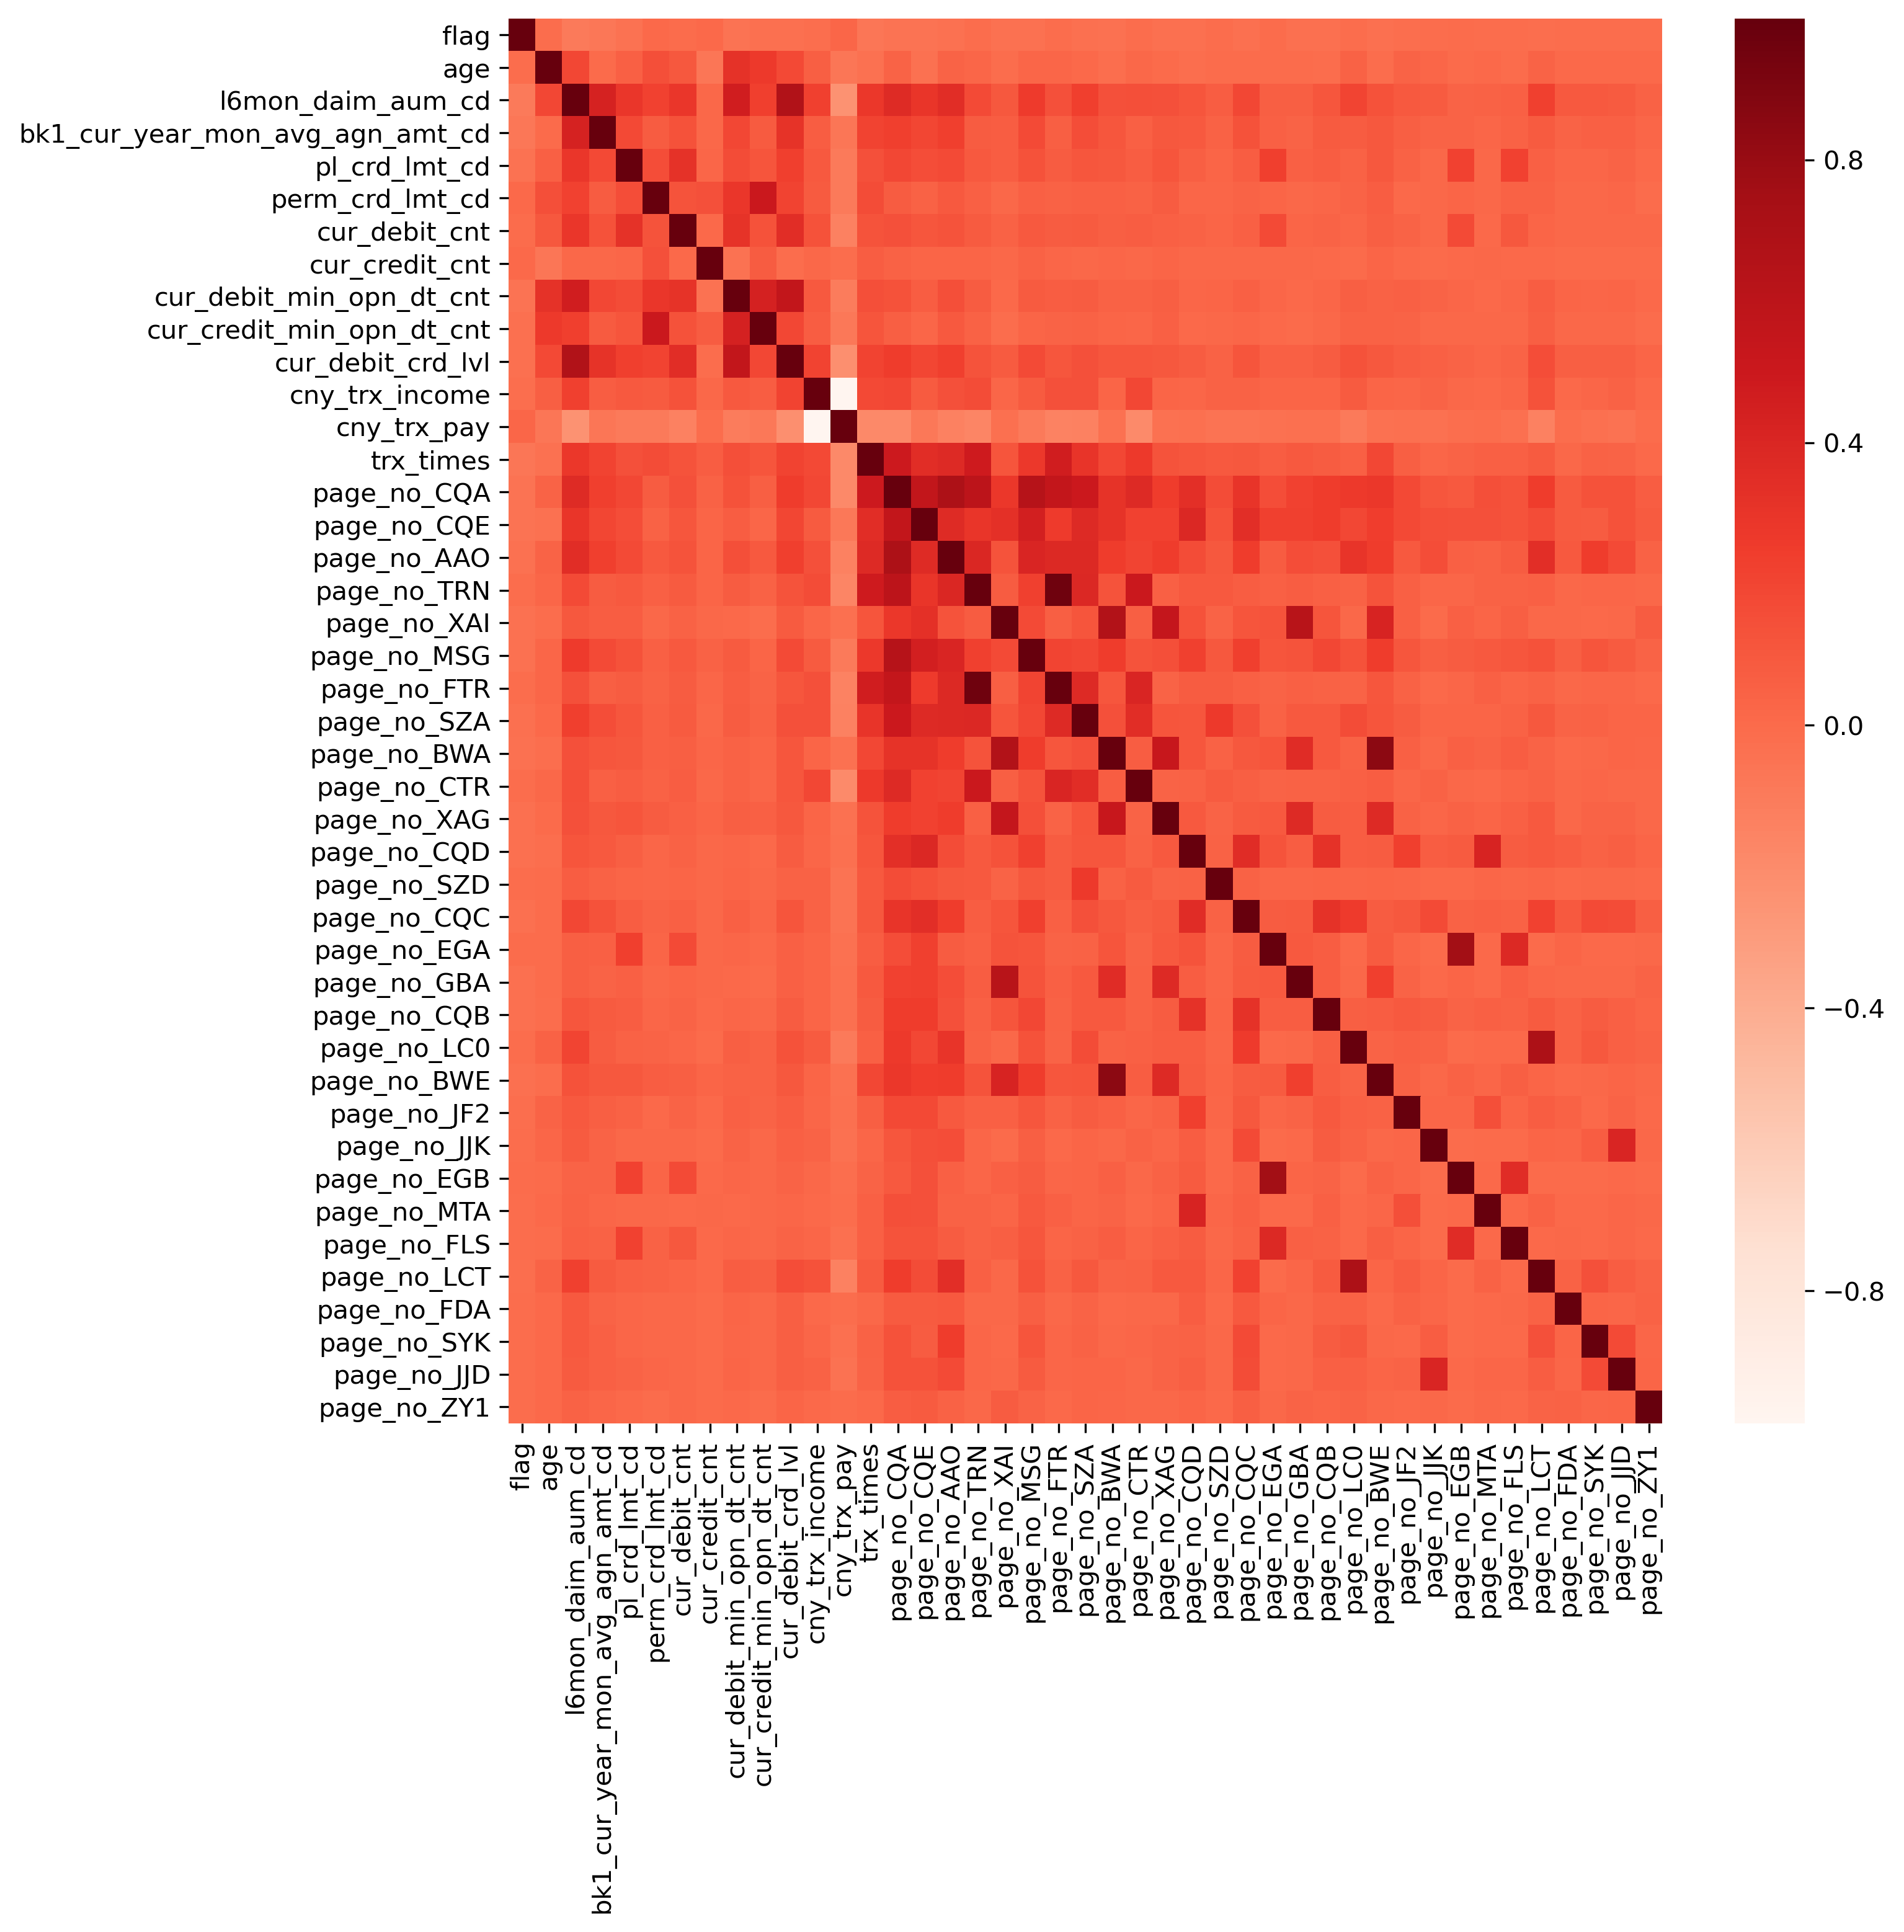

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10, 10), dpi = 300)
sns.heatmap(train_DF.corr(), cmap = 'Reds')#, annot = True)
plt.show()

In [ ]:
plt.figure(figsize = (20, 20), dpi = 300)
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
for n, i in enumerate(train_DF.columns):
    plt.subplot()

In [38]:
train_beh_DF[train_beh_DF['id'] == 'U0001B8']

,id,flag,page_no,Unnamed: 3,page_tm
14931,U0001B8,1,AAO,2019-06-14 16:43:12,NaN
14932,U0001B8,1,CQA,2019-06-26 15:01:11,NaN
14933,U0001B8,1,MSG,2019-06-03 09:23:33,NaN
14934,U0001B8,1,CQE,2019-06-03 09:23:31,NaN
14935,U0001B8,1,AAO,2019-06-14 16:43:12,NaN
14936,U0001B8,1,CQE,2019-06-14 16:43:06,NaN
14937,U0001B8,1,CQA,2019-06-26 14:55:54,NaN
14938,U0001B8,1,CQE,2019-06-15 09:17:37,NaN
14939,U0001B8,1,LC0,2019-06-19 15:25:14,NaN
14940,U0001B8,1,CQA,2019-06-14 16:42:55,NaN


In [102]:
id_flag = train_trd_DF.groupby(['id', 'flag'])

id_flag = id_flag.count()
id_flag.head()

,,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt
id,flag,,,,,,
U10000,0,273,273,273,273,273,273
U10001,0,132,132,132,132,132,132
U10002,0,3,3,3,3,3,3
U1000216,1,40,40,40,40,40,40
U10003,0,185,185,185,185,185,185


In [103]:
id_flag.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40000 entries, ('U10000', 0) to ('U999976', 1)
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Dat_Flg1_Cd  40000 non-null  int64
 1   Dat_Flg3_Cd  40000 non-null  int64
 2   Trx_Cod1_Cd  40000 non-null  int64
 3   Trx_Cod2_Cd  40000 non-null  int64
 4   trx_tm       40000 non-null  int64
 5   cny_trx_amt  40000 non-null  int64
dtypes: int64(6)
memory usage: 2.3+ MB
